# Linear Regression

## Polynomial Regression(다항 회귀)

### Polynomial Features  
- 1차 방정식을 고차다항식으로 변경하는 기법  
- sklearn.preprocessing.PolynomialFeatures 사용

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(size):
    x = np.linspace(0, 5, size)  #0부터5까지의 수를 size만큼 균일하게 생성
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)

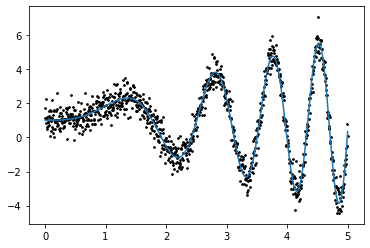

In [3]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [4]:
X.shape, y.shape

((1000,), (1000,))

In [5]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

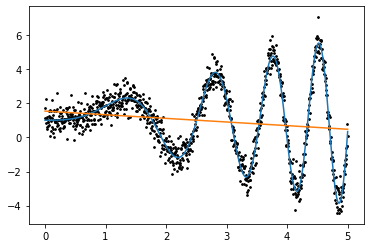

In [7]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [9]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)

LinearRegression(fit_intercept=False)

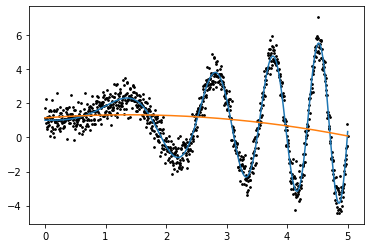

In [10]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [11]:
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24, 4.93684710e-26,
        2.47089445e-28, 1.23668391e-30, 6.18960915e-33, 3.09790248e-35,
        1.55050174e-37],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20, 1.01106629e-22,
        1.01207837e-24, 1.01309146e-26, 1.01410556e-28, 1.01512068e-30,
        1.01613682e-32]])

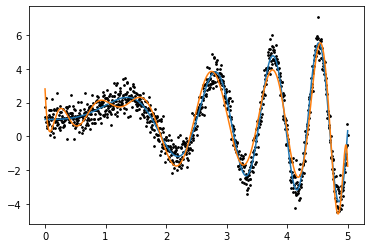

In [12]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [13]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [14]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso()
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge()
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

C:\Users\keogu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2024.0288844884005, tolerance: 0.44491314577687846
  positive)
C:\Users\keogu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2018.676664488407, tolerance: 0.44491314577687846
  positive)
C:\Users\keogu\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.00523e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\keogu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2013.5615859667548, tolerance: 0.44491314577687846
  positive)
C:\Use

C:\Users\keogu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1938.8085444583385, tolerance: 0.44491314577687846
  positive)
C:\Users\keogu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1932.503940317031, tolerance: 0.44491314577687846
  positive)
C:\Users\keogu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1926.0138516099107, tolerance: 0.44491314577687846
  positive)
C:\Users\keogu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

In [15]:
import pandas as pd
from pandas import DataFrame
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.898914,2.200752,1.923184
11,1.892100,2.208025,1.905004
12,1.630010,2.212351,1.904065
13,1.366750,2.214753,1.878648
14,1.352895,2.216157,1.720870
15,0.938174,2.216938,1.468992
16,0.739283,2.217285,1.502268
17,0.709962,2.217312,1.307498
18,0.736416,2.217108,0.903503


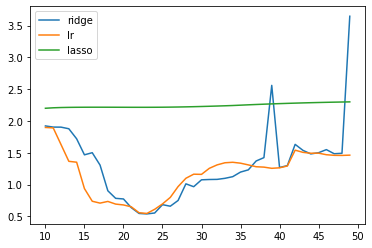

In [16]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [17]:
df.min()

lr_rmse       0.547429
lasso_rmse    2.200752
ridge_rmse    0.540123
dtype: float64

In [18]:
df["ridge_rmse"].sort_values().head()

poly_range
23    0.540123
22    0.547332
24    0.554583
21    0.638797
26    0.661226
Name: ridge_rmse, dtype: float64

In [19]:
poly_features = PolynomialFeatures(degree=22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)

Ridge(fit_intercept=False)

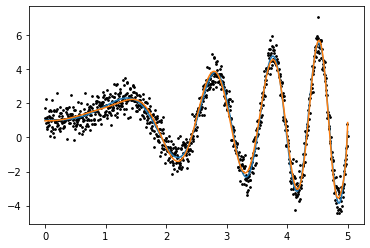

In [20]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

In [21]:
df = pd.read_csv("./data/yield.csv",sep="\t")
df.head()

,i,Temp,Yield
0,1,50,3.3
1,2,50,2.8
2,3,50,2.9
3,4,70,2.3
4,5,70,2.6


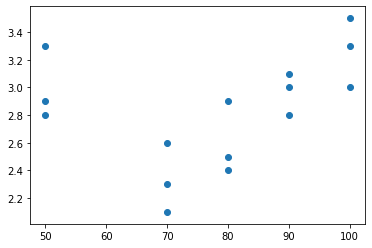

In [22]:
plt.scatter(df["Temp"], df["Yield"])
plt.show()

## Linear Regression - Performance measure techniques

### 성능 측정을 위해 데이터를 나누는 방법  
**training - validation - test**  
- Training - Model Building
- Validation - Model Check  
- Test - Model Evaluation

#### Validation  
- Test set은 Model이 생성시 절대 Training Set에 포함되지 않아야 함  
- Test Set과 달리 Model 생성시 Model에 성능을 평가하기 위해 사용  
- Hyper Parameter Tuning 시 성능 평가를 통해 Overfitting 방지  
- Training 중간에 Model의 성능을 점검

#### K-fold cross validation  
- 학습 데이터를 k번 나눠서 Test와 Train을 실시 > Test의 평균값을 사용  
- 모델의 Parameter 튜닝, 간단한 모델의 최종 성능 측정 등 사용

In [23]:
from sklearn import datasets
boston = datasets.load_boston()

In [24]:
X = boston.data
y = boston.target

In [25]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ",  len(test_index))

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [26]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830233, 34.07824620925929)

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830233, -34.07824620925929)

In [28]:
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores= cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

{'fit_time': array([0.00195289, 0.00299048, 0.00199485, 0.00199699, 0.01003408,
        0.004987  , 0.00199556, 0.00254393, 0.00199389, 0.00199485]),
 'score_time': array([0.00099611, 0.00099826, 0.00099945, 0.00099516, 0.00598478,
        0.00199461, 0.00099707, 0.00150871, 0.00199556, 0.00199366]),
 'test_neg_mean_squared_error': array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 'test_r2': array([ 0.66289033,  0.33452353, -0.50043664,  0.38035161,  0.33638098,
         0.4584511 , -0.0816218 ,  0.31138236, -0.21362102,  0.29459703])}

In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits=10, shuffle=True)

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.567391676289372, -24.500194839409208)

In [30]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [31]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049334, -23.862836317209965)

In [32]:
lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

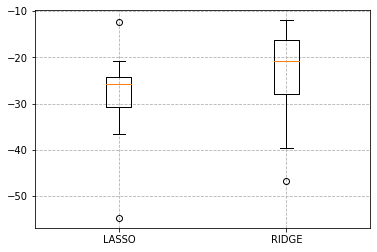

In [33]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

In [34]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [35]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01 
max_iter = 100

In [36]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)

C:\Users\keogu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


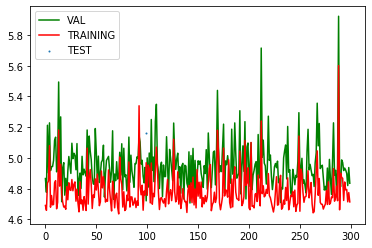

In [37]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [38]:
np.argsort(rmse_val_score)

array([142, 231,  16,  99,  67, 136, 197,  58, 115, 242, 208,  32,  19,
        21, 281, 278, 192, 133, 121, 176, 256, 146, 241,   1, 286,  80,
       276, 274,  76, 203, 223, 159, 233, 148, 112,  35, 163, 232, 155,
        87, 140, 101, 290, 264, 275, 200, 255, 297, 103, 167, 245, 144,
        48, 217,  47, 253, 299, 139, 182, 289,  97, 229,  53,  83,  64,
       181, 107,  69, 125, 162,  51, 254,  33, 224, 154, 230,  71, 237,
        42, 280,   0,  20, 188,  86, 210, 131,  72,  81, 247,  46, 273,
        78, 117, 118,  96, 211,  40, 149, 189, 222, 244, 262, 284, 246,
       204,  74,  37,  79, 263, 184,  68, 157,  25, 296,  59, 153,  39,
       190,  54,  34,   3, 239, 171,  11, 111, 173,  22, 195,  85, 250,
         5,  65, 293, 105, 205, 251, 285, 295, 261, 259,  30, 240, 128,
       243,  14,  38, 164, 124,  63, 270, 218, 294, 277,  17, 227, 298,
        98, 120, 113, 225, 185, 132,   6, 193,   7, 271, 138, 216, 134,
       172, 287, 156, 137, 272, 116, 178, 180,  24, 260, 201, 20

In [39]:
rmse(y_test,sgd_regressor.predict(X_test))

5.164802569120263

In [40]:
rmse(y_test,model_list[217].predict(X_test))

4.820264751131075

In [41]:
model_list[0].coef_

array([-1.13458239,  0.58030042,  0.02255285,  0.4619602 , -2.2305097 ,
        3.69203167, -0.11863358, -3.16893278,  1.72659814, -1.26874529,
       -2.10296752,  0.77539735, -3.55648426])